In [50]:
import numpy as np
import pandas as pd
# 경고 없애기
pd.options.mode.chained_assignment = None

# 데이터 읽어오기
army = pd.read_csv("file/육군 신체측정 데이터(수시 업데이터).csv", encoding='cp949')

# feature, columns 출력
print(army.columns)
print(len(army))

# 필요없는 feature 삭제
army.drop(['number', 'date', 'chest around', 'sleeve length', 'waist around', 'legs length', 'head around', 'food length'], axis='columns', inplace=True)
# bmi 열 추가
army['bmi'] = army['weight'] / army['kidney'] / army['kidney'] * 10000
# result 열 추가 + 가공
army['result'] = 0
for i in range(0, len(army['bmi'])):
    if army['bmi'][i] < 18.5:
        army['result'][i] = 1
    elif army['bmi'][i] >= 18.5 and army['bmi'][i] < 23.0:
        army['result'][i] = 2
    elif army['bmi'][i] >= 23.0 and army['bmi'][i] < 25.0:
        army['result'][i] = 3
    else:
        army['result'][i] = 4
# bmi 열 삭제
# army.drop(['bmi'], axis='columns', inplace=True)

army

Index(['number', 'date', 'chest around', 'sleeve length', 'kidney',
       'waist around', 'legs length', 'head around', 'food length', 'weight'],
      dtype='object')
135670


,kidney,weight,bmi,result
0,185.5,73.2,21.272731,2
1,167.2,65.1,23.286726,3
2,179.9,93.2,28.797420,4
3,171.4,71.6,24.372012,3
4,176.9,67.1,21.442077,2
...,...,...,...,...
135665,179.1,90.9,28.338229,4
135666,176.5,104.2,33.448627,4
135667,184.2,110.0,32.420032,4
135668,180.9,74.1,22.643371,2


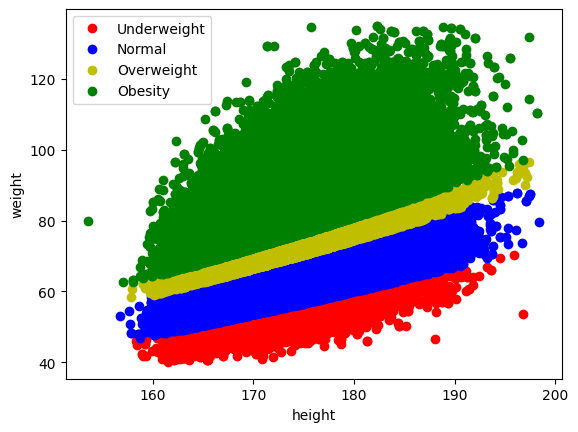

In [51]:
import matplotlib.pyplot as plt

height = army['kidney'].values  # 키 값
weight = army['weight'].values  # 몸무게 값
result = army['result'].values  # bmi 기준 값("1": 저체중, "2": 정상, "3": 과체중, "4": 비만)

plt.xlabel('height')    # x축 이름
plt.ylabel('weight')    # y축 이름

plt.plot(height[result==1][:], weight[result==1][:], "ro", label='Underweight')     # 저체중 : 빨간점
plt.plot(height[result==2][:], weight[result==2][:], "bo", label='Normal')          # 정상 : 파란점
plt.plot(height[result==3][:], weight[result==3][:], "yo", label='Overweight')      # 과체중 : 노란점
plt.plot(height[result==4][:], weight[result==4][:], "go", label='Obesity')         # 비만 : 초록점
plt.legend()       # 점색깔 이름 표시

In [56]:
# 데이터 가공
height = height.reshape(len(height), 1)
weight = weight.reshape(len(weight), 1)
x = np.append(height, weight, axis=1)
y = result.copy()

# 데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
print('정답:\n', y_test)

# 결정트리
from sklearn import tree
DT = tree.DecisionTreeClassifier()  # 결정트리생성
DT.fit(x_train, y_train)            # 학습
DTpredictions = DT.predict(x_test)
print('결정트리 예측:\n', DTpredictions)

# 최근접 이웃 탐색
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)
KNNpredictions = KNN.predict(x_test)
print('최근접 이웃 탐색 예측:\n', KNNpredictions)

# 서포트 백터 머신
from sklearn import svm
SVM = svm.SVC(gamma=0.001, C=100.)
SVM.fit(x_train, y_train)
SVMpredictions = SVM.predict(x_test)
print('서포트 벡터 머신 예측:\n', SVMpredictions)

# 성능
from sklearn.metrics import accuracy_score
print('모델     | 성능\n')
print('결정트리 | ', accuracy_score(DTpredictions, y_test)*100)     # 결정트리 성능
print('K-nn     | ', accuracy_score(KNNpredictions, y_test)*100)    # 최근접 이웃 탐색 성능
print('SVM      | ', accuracy_score(SVMpredictions, y_test)*100)    # 서포트 벡터 머신 성능

정답:
 [2 2 4 ... 3 2 2]
결정트리 예측:
 [2 2 4 ... 3 2 2]
최근접 이웃 탐색 예측:
 [2 2 4 ... 3 2 2]
서포트 벡터 머신 예측:
 [2 2 4 ... 3 2 3]
모델     | 성능

결정트리 |  99.7604481462372
K-nn     |  99.55775042382251
SVM      |  99.92260632416894
